## Comprendre la descente de gradient à partir de la régression linéaire

Dans ce notebook, nous allons essayer de comprendre l'outil clé de l'IA : La descente de gradient.
Nous utiliserons dans un premier temps la regression linéaire, qui permet l'optimisation d'un ou deux paramètre
pour étendre plus tard dans le cours aux réseaux de neurones

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn import datasets
import sklearn
import pandas
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)         # initiate notebook for offline plot
import plotly.graph_objects as go
import numpy as np
from utils.reg import show_points, moindre_carre, compute_error, grad_desc_b_fix, plot_erreur_2D

## Importation des données

In [2]:
data = genfromtxt("data/data2.csv", delimiter=",")
x, y = [], []
for j in data : x.append(j[0])
for j in data : y.append(j[1])
x.pop(0)
y.pop(0)
print("Données Importées")

Données Importées


### Première Visualisation des données

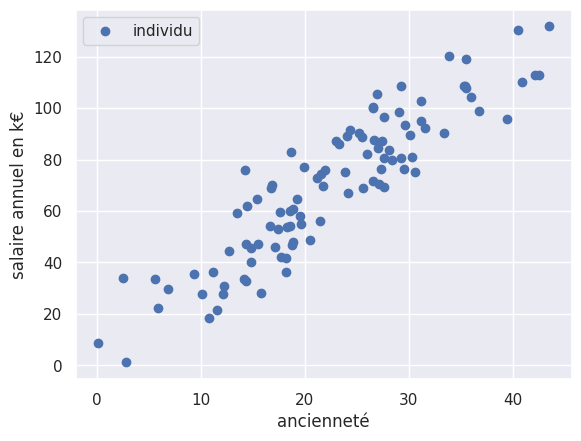

In [3]:
show_points(x,y)

a = 2.776215627209385 
b = 7.3169350103196535


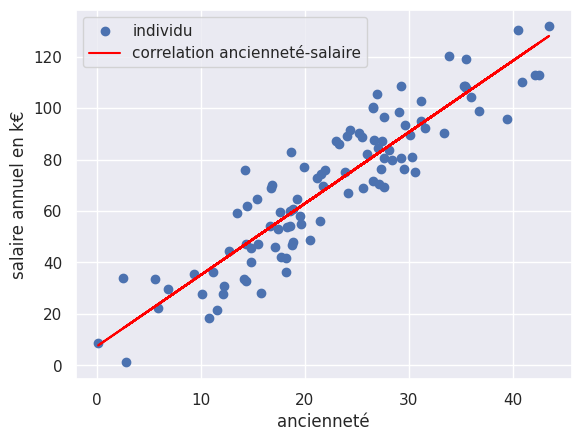

In [4]:
moindre_carre(x,y)

### Comment le ferions-nous à la main ?

In [5]:
def show_reg(a,b) :
    plt.scatter(x,y, label="individu")
    plt.plot(x, np.asarray(a)*x+b, color='red', label="correlation ancienneté-salaire")
    plt.xlabel("ancienneté")
    plt.ylabel("salaire annuel en k€")
    plt.legend()
    plt.xlim([-5,50])
    plt.ylim([-5,140])
    plt.show()
    
interact(show_reg, a=(-5,10,0.1), b=(-30,50));

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-5.0), IntSlider(value=10, descrip…

### Visualisons plus clairement le processus qu'on fait implicitement

In [6]:
def show_error(a,b,nb_points) :
    print(len(x))
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    plt.scatter(x_tmp,y_tmp, label="individu")
    plt.plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation age-salaire")
    line_list = np.asarray(a)*x_tmp + b
    plt.vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    plt.xlabel("ancienneté")
    plt.ylabel("salaire annuel en k€")
    plt.xlim([-5,50])
    plt.ylim([-5,140])
    plt.legend()
    plt.show()
    
interact(show_error, a=(-5,10,0.1), b=(-30,30), nb_points=(10,100));

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-5.0), IntSlider(value=0, descript…

### Introduction de la fonction d'erreur

In [12]:
def fonction_erreur_1(a, nb_points) :
    b = 0
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    line_list = np.asarray(a)*x_tmp + b
    
    axes[0].scatter(x_tmp,y_tmp, label="individu")
    axes[0].plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation ancienneté-salaire")
    axes[0].vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    axes[0].set_xlabel("ancienneté")
    axes[0].set_ylabel("salaire annuel en k€")
    axes[0].set_xlim([-5,50])
    axes[0].set_ylim([-5,140])
    axes[0].legend()
    
    axes[1].scatter(a, compute_error(a,b,x_tmp,y_tmp), marker="+", color ="red", s=250)
    axes[1].set_xlabel("coefficeint a")
    axes[1].set_ylabel("distance des points à la droite")
    axes[1].set_xlim([0,6.5])
    axes[1].set_ylim([0,5000])

    plt.show()
    
interact(fonction_erreur_1, a=(0,6,0.01), nb_points=(10,100));

interactive(children=(FloatSlider(value=3.0, description='a', max=6.0, step=0.01), IntSlider(value=55, descrip…

### Visualisation de l'ensemble des valeurs pouvant être prise par la fonction d'erreur

In [14]:
a_visu = np.arange(-8,14,0.01)
b_visu = 0

def fonction_erreur_2(a, nb_points) :
    b = 0
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    line_list = np.asarray(a)*x_tmp + b
    
    axes[0].scatter(x_tmp,y_tmp, label="individu")
    axes[0].plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation ancienneté-salaire")
    
    axes[0].vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    axes[0].set_xlabel("ancienneté")
    axes[0].set_ylabel("salaire annuel en k€")
    axes[0].set_xlim([-5,50])
    axes[0].set_ylim([-5,140])
    axes[0].legend()
    
    axes[1].scatter(a, compute_error(a,b,x_tmp,y_tmp), marker="+", color ="red", s=250)
    axes[1].plot(a_visu, compute_error(a_visu,b, x_tmp, y_tmp))
    axes[1].set_xlabel("coefficeint a")
    axes[1].set_ylabel("fonction de coût C(a)")
    axes[1].set_xlim([0,6.5])
    axes[1].set_ylim([0,5000])

    plt.show()
    
interact(fonction_erreur_2, a=(0,6.5,0.01), nb_points=(10,100));

interactive(children=(FloatSlider(value=3.25, description='a', max=6.5, step=0.01), IntSlider(value=55, descri…

## Descente de gradient (à b fixé)

coeff a par la descente de gradient : 3.0530630385265987
coeff b (fixé au début) : 0



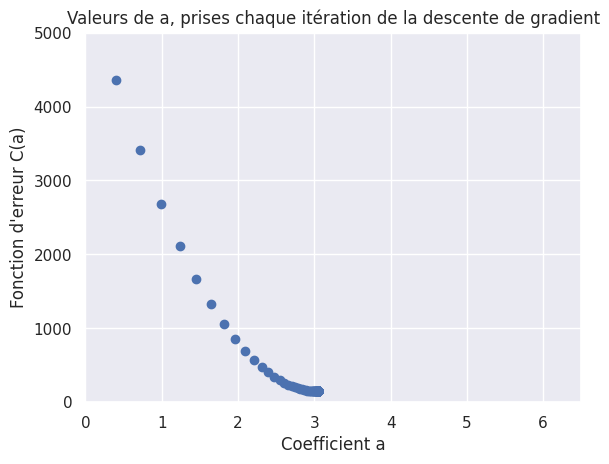

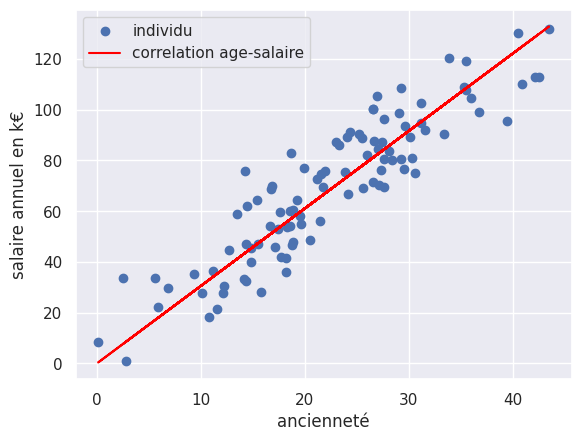

In [9]:
lr = 0.0001 # Learning Rate (vitesse à laquelle on réalise la descente de gradient
xlim = [0,6.5] 
ylim = [0,5000]
epochs = 1000  # nombre d'itération

#lr = 0.001
#xlim = [2,4]
#ylim = [100,1000]
    
grad_desc_b_fix(x, y, lr, epochs, xlim, ylim)

### Revenons au cas où nous apprenons 2 paramètres (b n'est plus fixé)

In [10]:
interact(show_error, a=(-5,10,0.1), b=(-30,30), nb_points=(10,100));

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-5.0), IntSlider(value=0, descript…

(200, 100) (200, 100) (200, 100)


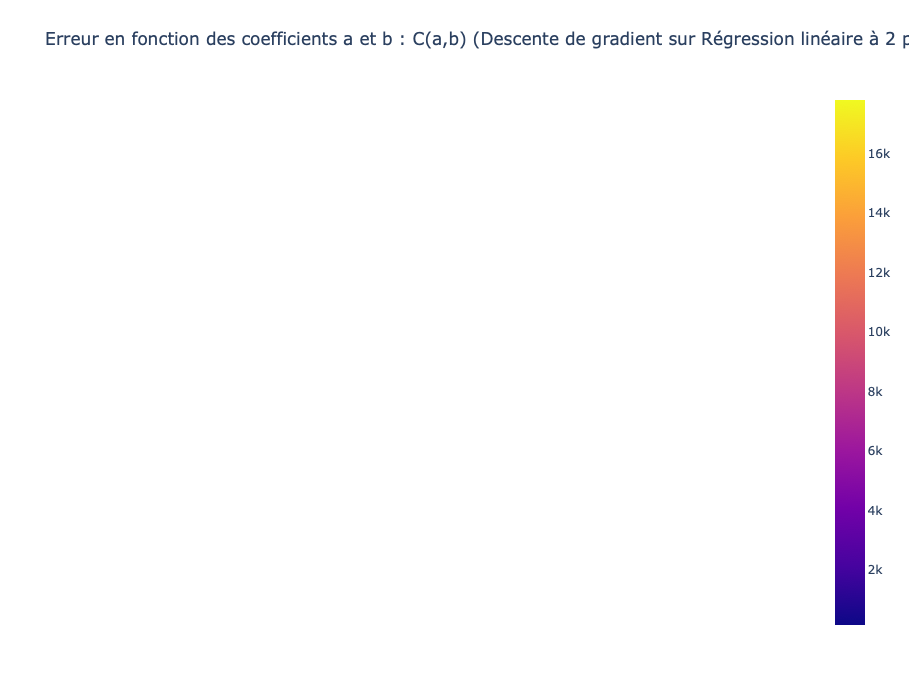

In [11]:
plot_erreur_2D(x,y)